# 第11篇：时序数据处理

## 第一部分：时间的基本概念


时间是一个比较特殊的事物，不像数字有具体的进制，可以做相关的计算。比如时间分秒时是60进制，时和天又是24进制，一周又有7天，一月又有28到31天不等，等等。这就给我们处理时间问题带来了麻烦。为了更好地表达现实世界中的时间，计算机设计者提出了一些概念来进行表达。

### 固定时间
这个非常简单，它是一个独立的时间，不在任何周期时，比如中午 13:30 睡觉，不代表你每半个小时就睡一次。其他的如，2020 年、农历四月十八、19世纪等等。

固定的时间有一定的属性，如所在年、月、日、毫秒等。

### 时间戳 timestamp
Unix时间戳(Unix timestamp)，时间戳是指格林威治时间1970年01月01日00时00分00秒起至当下的总秒数。它是一个非常大的数字，一直以一秒的步长在增加。如：1591684854 代表北京时间 2020/6/9 14:40:54。那么 1970年 年以前的时间怎么表示呢？用负数，如-1591684957 代表1919/7/26 2:17:23。

### 时长时差 Time deltas
代表一个时间长度，但它没有指定的开始时间和结束时间，比如一首歌4分钟，你不管从什么时候开始，它都会占用4分钟。

### 格式化时间
由于原始时间数据可能是时间戳，也有可能是其他类型的数据，我们在使用时想按照一定的格式进行显示，就需要做格式化处理。如时间戳 1591684854 和 2020/6/9 14:40:54 转换为为 2020年06月09日 这样的中文格式。

### 周期时间
有开始、有结束，并且有时间单位周期的时间，比如从大学毕业后，我开始工作，每周一到周五去工作，持续到65岁退休，这个就是工作日周期。另如钟表，每半小时响一次，开始时间是我安装好它，结束时间是它坏掉的时候。

### 日期偏移 Date offsets
周期时间中有一个频率，一个频率是一个单位，日期偏移是基于这个频率，如一个周期的频率是小时，那偏移三个频率就是三小时。比如偏移一个工作周，这个工作周期是自己定义的。

### 时区
每个固定的时间都会有一个时区，一般为你电脑本地的时区，当然你根据需要可以进行调整。

### 工作日
在数据分析时，经常会与是否工作日相关，除了正常的周末，每个国家和地区节假日，甚至具体到一些公司都会有一些特定的作息，一般需要自己来指定这个工作日的周期。

### 时间转换
时间转换包括时间表达格式的转换，也会有一些时间计算，比如给一个时间，转为去年的当天、100天前的当天、转换为特定时区的时间等等。

## 第二部分：时序数据类型
时间序列（Time series）数据是非常重要的数据类型，在各个领域的研究中，都与时间相关，因此对于时间数据的处理就越来越重要。Pandas 提供了多种时间数据类型和处理方法。

### 1. 四类时间序列变量

| 时间概念                  | 类型表示       | Array 类       | pandas 类型                          | 创建方法                        |
| --------------------- | ---------- | -------------- | ------------------------------------ | ------------------------------- |
| 固定时间 (Date times)   | Timestamp  | DatetimeIndex  | datetime64[ns] or datetime64[ns, tz] | to_datetime or date_range       |
| 时长 (Time deltas)      | Timedelta  | TimedeltaIndex | timedelta64[ns]                      | to_timedelta or timedelta_range |
| 周期 （Time spans）       | Period     | PeriodIndex    | period[freq]                         | Period or period_range          |
| 日期偏移 （Date offsets） | DateOffset | None           | None                                 | DateOffset                      |

通常时间序列数据作为 Series 或 DataFrame 的索引，以方便对时间数据进行操作。

### 2 固定时间的创建
带时间戳的数据是时间序列数据的最基本类型，它将值与时间点相关联，对它可以进行相关的时间操作，如何定义转换当非常关键。同时一个具体的时间包含了非常丰富的信息，如年份、在周几、在几月、在哪个季度，需要我们进行属性的读取。

#### 定义一个时间
pd.Timestamp() 是定义时间的主要函数，代替 python 中的 datetime.datetime 对象。

导入相关模块

In [2]:
import pandas as pd
import numpy as np

#### 使用 python 的 datetime 库

In [4]:
import datetime
# 至少需要年月日
pd.Timestamp(datetime.datetime(2021, 2, 1))

Timestamp('2021-02-01 00:00:00')

In [5]:
# 指定是时分秒
pd.Timestamp(datetime.datetime(2021, 2, 1, 18, 39, 32))

Timestamp('2021-02-01 18:39:32')

#### 指定时间字符串

In [6]:
pd.Timestamp('2018-08-01')

Timestamp('2018-08-01 00:00:00')

In [7]:
pd.Timestamp('2021-01-01T12')

Timestamp('2021-01-01 12:00:00')

#### 指定时间位置数字
可以依次定义 year, month, day，hour, minute, second, microsecond：

In [8]:
pd.Timestamp(2008, 8, 8)

Timestamp('2008-08-08 00:00:00')

In [9]:
pd.Timestamp(2008, 8, 8, 8)

Timestamp('2008-08-08 08:00:00')

In [10]:
pd.Timestamp(year=2008, month=8, day=8, hour=8)

Timestamp('2008-08-08 08:00:00')

#### 解析时间戳

In [14]:
pd.Timestamp(1612176206.2, unit='s') # 单位为秒

Timestamp('2021-02-01 10:43:26.200000048')

#### 指定时区

In [15]:
pd.Timestamp(1612176206, unit='s', tz='US/Pacific')

Timestamp('2021-02-01 02:43:26-0800', tz='US/Pacific')

In [16]:
# 指定为北京时间
pd.Timestamp(1612176206, unit='s', tz='Asia/Shanghai')

Timestamp('2021-02-01 18:43:26+0800', tz='Asia/Shanghai')

#### 特殊时间
以下可取得当前时间，从而可通过属性取到今天日期、年份等信息：

In [17]:
pd.Timestamp('today')

Timestamp('2021-02-01 18:46:09.627130')

In [18]:
pd.Timestamp('now')

Timestamp('2021-02-01 18:46:15.060057')

In [19]:
pd.Timestamp('today').date() # 只取日期

datetime.date(2021, 2, 1)

也可以计算出昨天、明天等信息：

In [20]:
# 昨天
pd.Timestamp('now')-pd.Timedelta(days=1)

Timestamp('2021-01-31 18:46:50.276669')

In [21]:
# 明天
pd.Timestamp('now')+pd.Timedelta(days=1)

Timestamp('2021-02-02 18:46:56.115898')

In [22]:
# 当月初，一日
pd.Timestamp('now').replace(day=1)

Timestamp('2021-02-01 18:47:07.699907')

#### 时间限制
由于 Pandas 以纳秒粒度表示时间戳，因此可以使用64位整数表示的时间跨度限制为大约584年：

In [24]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [25]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

以上为支持的最早最晚时间。

### 3. 时间属性操作
一个具体的时间包含了非常丰富的信息，如年份、在周几、在几月、在哪个季度，需要我们进行属性的读取。

#### 时间的属性 Attributes
我们先定义一个当前时间：

In [26]:
time = pd.Timestamp('now')
time

Timestamp('2021-02-01 18:50:17.041362')

In [27]:
time.asm8 # 返回 numpy datetime64格式（以纳秒为单位）。

numpy.datetime64('2021-02-01T18:50:17.041362000')

其他属性：
- time.dayofweek # 周几，周一为0
- time.day_of_week # 同上
- time.dayofyear #  一年的第几天
- time.day_of_year # 同上
- time.days_in_month # 当月有多少天
- time.daysinmonth # 同上
- time.freqstr # 周期字符
- time.is_leap_year # 是否闰年，公历的
- time.is_month_end #  是否当月最后一天
- time.is_month_start # 是否当月第一天
- time.is_quarter_end # 是否当季最后一天
- time.is_quarter_start # 是否当季第一天
- time.is_year_end # 是否当年最后一天
- time.is_year_start # 是否当年第一天
- time.quarter # 当前季度数
- time.tz # 当前时区别名
- time.week # 当年第几周
- time.weekofyear # 同上
- time.day #  日
- time.fold
- time.freq # 频度周期
- time.hour # 时
- time.microsecond # 微秒
- time.minute # 分
- time.month # 月
- time.nanosecond # 纳秒
- time.second # 秒
- time.tzinfo # None
- time.value # 时间戳
- time.year # 年

#### 时间的方法 Methods
取一个当前时间，并指定时区为北京时间：

In [28]:
time = pd.Timestamp('now', tz='Asia/Shanghai')
time

Timestamp('2021-02-01 18:55:06.578998+0800', tz='Asia/Shanghai')

In [29]:
# 转换为指定时区
time.astimezone('UTC')

Timestamp('2021-02-01 10:55:06.578998+0000', tz='UTC')

In [30]:
# 转换单位，向上舍入
time.ceil('s') # 转为以秒为单位

Timestamp('2021-02-01 18:55:07+0800', tz='Asia/Shanghai')

In [31]:
time.ceil('ns') # 转为以纳秒为单位
time.ceil('d') # 保留日
time.ceil('h') # 保留时

Timestamp('2021-02-01 19:00:00+0800', tz='Asia/Shanghai')

In [32]:
# 转换单位, 为向下舍入
time.floor('h') # 保留时

Timestamp('2021-02-01 18:00:00+0800', tz='Asia/Shanghai')

In [33]:
# 类似四舍五入
time.round('h') # 保留时

Timestamp('2021-02-01 19:00:00+0800', tz='Asia/Shanghai')

In [34]:
# 返回星期名
time.day_name()

'Monday'

In [ ]:
# 月份名称
time.month_name() # 'June'

In [35]:
# 将时间戳规范化为午夜，保留tz信息。
time.normalize()

Timestamp('2021-02-01 00:00:00+0800', tz='Asia/Shanghai')

In [36]:
# 时间元素替换 datetime.replace，可处理纳秒。
time.replace(year=2019) # 年份换为2019年

Timestamp('2019-02-01 18:55:06.578998+0800', tz='Asia/Shanghai')

In [37]:
time.replace(month=8) # 月份换为8月

Timestamp('2021-08-01 18:55:06.578998+0800', tz='Asia/Shanghai')

In [38]:
# 转为周期类型，将丢失时区
time.to_period(freq='h') # 周期为小时

<ipython-input-38-1ba4d122f88a>:2: UserWarning: Converting to Period representation will drop timezone information.
  time.to_period(freq='h') # 周期为小时


Period('2021-02-01 18:00', 'H')

In [39]:
# 转为指定时区
time.tz_convert('UTC') # 转为 utc 时间

Timestamp('2021-02-01 10:55:06.578998+0000', tz='UTC')

In [40]:
# 本地化时区转换
time = pd.Timestamp('now')
time.tz_localize('Asia/Shanghai')

Timestamp('2021-02-01 18:58:00.359104+0800', tz='Asia/Shanghai')

In [41]:
# Timestamp('2020-06-09 17:32:47.388726+0800', tz='Asia/Shanghai')
time.tz_localize(None) # 删除时区

Timestamp('2021-02-01 18:58:00.359104')

#### .dt 时间访问器
对于时间序列数据，可以使用 s.dt.xxx 的形式来访问它们的属性和调用它们的方法

```python
s = pd.Series(pd.date_range('2020-01-01', periods=3, freq='d'))
s.dt.date
s.dt.time
s.dt.timetz
s.dt.year
s.dt.month
s.dt.day
s.dt.hour
s.dt.minute
s.dt.second
s.dt.microsecond
s.dt.nanosecond
s.dt.week
s.dt.weekofyear
s.dt.dayofweek
s.dt.weekday
s.dt.dayofyear
s.dt.quarter
s.dt.is_month_start
s.dt.is_month_end
s.dt.is_quarter_start
s.dt.is_quarter_end
s.dt.is_year_start
s.dt.is_year_end
s.dt.is_leap_year
s.dt.daysinmonth
s.dt.days_in_month
s.dt.tz
s.dt.freq
s.dt.to_period
s.dt.to_pydatetime
s.dt.tz_localize
s.dt.tz_convert
s.dt.normalize
s.dt.strftime
s.dt.round
s.dt.floor
s.dt.ceil
s.dt.month_name
s.dt.day_name
s.dt.qyear
s.dt.start_time
s.dt.end_time
s.dt.days
s.dt.seconds
s.dt.microseconds
s.dt.nanoseconds
s.dt.components
s.dt.to_pytimedelta
s.dt.total_seconds

# 个别用法举例
s.dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
s.dt.strftime('%Y/%m/%d')
```
对于固定时间会返回固定的结果，对于这序列会返回对应值的序列。

### 4. 时间类型转换
由于时间格式样式比较多，很多情况下 Padnas 并不能自动识别为时间类型，所以我们在处理前的数据清洗过程中，需要专门对数据进行时间类型转换。

#### astype 转换
astype 是最简单的时间转换方法，它只能针对相对标准的时间格式，如：

In [43]:
s = pd.Series(['2020-01-31', '2020-02-29', '2020-03-31'])
s.astype('datetime64[ns]')

0   2020-01-31
1   2020-02-29
2   2020-03-31
dtype: datetime64[ns]

指定时区

In [44]:
s.astype('datetime64[ns, US/Eastern]')

0   2020-01-31 00:00:00-05:00
1   2020-02-29 00:00:00-05:00
2   2020-03-31 00:00:00-04:00
dtype: datetime64[ns, US/Eastern]

#### 转为时间 to_datetime
Pandas 提供的 pd.to_datetime() 是识别转换时间的主要工具。接下来我们看一些例子。

从 DataFrame 的多个列中组合一个日期时间。 键可以是常见的缩写，例如['year'，'month'，'day'，'minute'，'second'，'ms'，'us'，'ns']）：

- 必须: year, month, day
- 可选: hour, minute, second, millisecond, microsecond, nanosecond

In [45]:
df = pd.DataFrame({'year': [2020, 2021],
                   'month': [2, 3],
                   'day': [4, 5]})
df

,year,month,day
0,2020,2,4
1,2021,3,5


In [46]:
pd.to_datetime(df)

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

In [47]:
pd.to_datetime(df[['year', 'month', 'day']]) # 同上

0   2020-02-04
1   2021-03-05
dtype: datetime64[ns]

智能解析时间：

In [53]:
pd.to_datetime(pd.Series(['Dec 31, 2008', '2018-01-10', None]))

0   2008-12-31
1   2018-01-10
2          NaT
dtype: datetime64[ns]

In [54]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [55]:
pd.to_datetime(['04-01-2012 10:00'], dayfirst=True) # 日期在前

DatetimeIndex(['2012-01-04 10:00:00'], dtype='datetime64[ns]', freq=None)

可以使用 pd.Timestamp() 进行转换：

In [57]:
pd.to_datetime('2010/11/12')

Timestamp('2010-11-12 00:00:00')

In [58]:
pd.Timestamp('2010/11/12')

Timestamp('2010-11-12 00:00:00')

pd.DatetimeIndex 也可以转换：

In [59]:
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'])

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq=None)

In [60]:
pd.DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], freq='infer')

DatetimeIndex(['2018-01-01', '2018-01-03', '2018-01-05'], dtype='datetime64[ns]', freq='2D')

对于有格式的数据，需要指定数据的格式：

```python
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
# 可以让系统自己推断时间格式
pd.to_datetime('13000101', infer_datetime_format=True, errors='ignore')
# datetime.datetime(1300, 1, 1, 0, 0)
# coerce 将不会忽略错误，返回空值
pd.to_datetime('13000101', format='%Y%m%d', errors='coerce')
# NaT

# 有时间需要字段转为字符
pd.to_datetime(df.d.astype(str), format='%m/%d/%Y')

# 其他
pd.to_datetime('2010/11/12', format='%Y/%m/%d')
# Timestamp('2010-11-12 00:00:00')

pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
# Timestamp('2010-11-12 00:00:00')
对时间戳进行转换，需要给出时间单位，一般为秒：

pd.to_datetime(1490195805, unit='s')
# Timestamp('2017-03-22 15:16:45')
pd.to_datetime(1490195805433502912, unit='ns')
# Timestamp('2017-03-22 15:16:45.433502912')
对周期数据进行转换：

pd.to_datetime([1, 2, 3], unit='D',
               origin=pd.Timestamp('1960-01-01'))
# DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq
```

#### 日期格式化符号
python中时间日期格式化符号：

- %y 两位数的年份表示（00-99）  
- %Y 四位数的年份表示（000-9999）  
- %m 月份（01-12）
- %d 月内中的一天（0-31）
- %H 24小时制小时数（0-23）
- %I 12小时制小时数（01-12）
- %M 分钟数（00-59）
- %S 秒（00-59）
- %a 本地简化星期名称
- %A 本地完整星期名称
- %b 本地简化的月份名称
- %B 本地完整的月份名称
- %c 本地相应的日期表示和时间表示
- %j 年内的一天（001-366）
- %p 本地A.M.或P.M.的等价符
- %U 一年中的星期数（00-53）星期天为星期的开始
- %w 星期（0-6），星期天为星期的开始
- %W 一年中的星期数（00-53）星期一为星期的开始
- %x 本地相应的日期表示
- %X 本地相应的时间表示
- %Z 当前时区的名称
- %% %号本身

### 5. 时间范围
时间周期的特点是有开始时间有结束时间，也会有一个周期频率（虽然有时候也会没有），广泛应用在经济、物理、金融等领域。

#### 生成时间范围
可以使用 pd.DatetimeIndex() 和 pd.Index() 来构造时间范围数据：

In [62]:
dates = [datetime.datetime(2012, 5, 1),
         datetime.datetime(2012, 5, 2),
         datetime.datetime(2012, 5, 3)]

# 无频率
pd.DatetimeIndex(dates)
# pd.Index(dates) # 效果同上

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

In [64]:
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range(start='1/1/2018', periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range(end='1/1/2018', periods=8)

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.date_range(start='2018-04-24', end='2018-04-27', periods=3)

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-25 12:00:00',
               '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

date_range 的默认频率是 D 日，可以指定为其他频率，

In [68]:
# 指定频率为月
pd.date_range(start='1/1/2018', periods=5, freq='M')

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', freq='M')

#### 固定频率 date_range
在实际使用中，我们只需要给出开始和结束时间和频率，pd.date_range 系统会快速生成时间范围数据：

In [69]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2012, 1, 1)
pd.date_range(start, end)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-12-23', '2011-12-24', '2011-12-25', '2011-12-26',
               '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30',
               '2011-12-31', '2012-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

多个单位频率

In [70]:
# 三个月
pd.date_range(start='1/1/2018', periods=5, freq='3M')

DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

频率也可以使用时间偏移

In [72]:
# 三个月，取月最后一天
pd.date_range(start='1/1/2018', periods=5, freq=pd.offsets.MonthEnd(3))

DatetimeIndex(['2018-01-31', '2018-04-30', '2018-07-31', '2018-10-31',
               '2019-01-31'],
              dtype='datetime64[ns]', freq='3M')

可以指定时区：

In [73]:
# 东京时间
pd.date_range(start='1/1/2018', periods=5, tz='Asia/Tokyo')

DatetimeIndex(['2018-01-01 00:00:00+09:00', '2018-01-02 00:00:00+09:00',
               '2018-01-03 00:00:00+09:00', '2018-01-04 00:00:00+09:00',
               '2018-01-05 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', freq='D')

closed 可以做开始和结束时间开闭区间的控制：

In [74]:
# None 两边都包含
pd.date_range(start='2017-01-01', end='2017-01-04', closed=None)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')

In [75]:
# left 不包含右边
pd.date_range(start='2017-01-01', end='2017-01-04', closed='left')

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq='D')

In [76]:
# right 不包含左边
pd.date_range(start='2017-01-01', end='2017-01-04', closed='right')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04'], dtype='datetime64[ns]', freq='D')

#### 工作日频率 bdate_range
pd.bdate_range 可以生成一个以工作日频率的日期范围，周末两天将会被跳过：

In [77]:
pd.bdate_range(start='1/1/2021', end='1/08/2021')

DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', freq='B')

在四个参数中：开始，结束，周期和频率，必须精确指定三个。 指定频率是 bdate_range 的要求。 如果不需要指定频率，请使用 date_range。

#### 频率
以上两个方法中都会要求传入频率，频率可以用时间偏移对象（DateOffset objects）的别名表示。

### 6. 时间偏移
周期数据有一个基础频率，或者叫分辨率、粒度，时间偏移由基础频率和乘数组成，这对我们处理周期数据非常有用。  
Pandas 专门提供了一个时间偏移对象（Date offsets）来完成时间偏移工作，本文将介绍 Date offsets 的构成和使用方法。DateOffset 基础操作类似于 dateutil.relativedelta（relativedelta 文档），可以按真实的日历进行时间偏移，并用算数运算符（+）或 apply 进行日期偏移操作。

#### DateOffset 对象
DateOffset 类似于时间差 Timedelta ，但它使用日历中时间日期的规则，而不是直接进行时间性质的算术计算，让时间更符合实际生活。比如，有些地区使用夏令时时，每日偏移时间有可能是 23 或 24 小时，甚至 25 个小时。  
**DataOffset与Timedelta的区别**  
- Timedelta绝对时间差的特点指无论是冬令时还是夏令时，增减1day都只计算24小时
- DataOffset相对时间差指，无论一天是23\24\25小时，增减1day都与当天相同的时间保持一致

#### DateOffset 示例
以下所示了夏令时的情况：

In [122]:
# 生成一个指定的时间，芬兰赫尔辛基时间执行夏令时
ts = pd.Timestamp('2016-10-30 00:00:00', tz='Europe/Helsinki')
ts

Timestamp('2016-10-30 00:00:00+0300', tz='Europe/Helsinki')

In [125]:
# 增加一天
ts + pd.Timedelta(days=1)

Timestamp('2016-10-30 23:00:00+0200', tz='Europe/Helsinki')

In [126]:
# 按日历时间
ts + pd.DateOffset(days=1)

Timestamp('2016-10-31 00:00:00+0200', tz='Europe/Helsinki')

这似乎有些令人头大，但只要把tz（time zone）去除就可以不用管它了，两者保持一致，除非要使用到时区变换

In [143]:
# 增加一天
ts + pd.Timedelta(days=1)

Timestamp('2016-10-31 00:00:00')

In [144]:
# 按日历时间
ts + pd.DateOffset(days=1)

Timestamp('2016-10-31 00:00:00')

以下是增加工作日，出现跨周末的情况：

In [142]:
# 生成一个指定的时间，芬兰赫尔辛基时间执行夏令时
ts = pd.Timestamp('2016-10-30 00:00:00')
ts

Timestamp('2016-10-30 00:00:00')

In [127]:
friday = pd.Timestamp('2018-01-05')
friday.day_name()

'Friday'

In [128]:
# 增加两个工作日，从周五到周二
two_business_days = 2 * pd.offsets.BDay()
two_business_days.apply(friday)

Timestamp('2018-01-09 00:00:00')

In [130]:
friday + two_business_days

Timestamp('2018-01-09 00:00:00')

In [131]:
(friday + two_businbess_days).day_name()

'Tuesday'

#### 增减一段时间
DateOffset的可选参数包括years/months/weeks/days/hours/minutes/seconds  
所有的日期偏移对象都在 pandas.tseries.offsets 下，其中 pandas.tseries.offsets.DateOffset 是标准的日期范围时间偏移类型，用于日期范围的标准日期增量类型。它默认是一个日历日。

In [132]:
ts = pd.Timestamp('2017-01-01 09:10:11')
ts + pd.DateOffset(months=3)

Timestamp('2017-04-01 09:10:11')

In [133]:
ts + pd.DateOffset(hours=2)

Timestamp('2017-01-01 11:10:11')

In [134]:
ts + pd.DateOffset()

Timestamp('2017-01-02 09:10:11')

#### 各类常用offset对象

| freq   | D/B             | W    | (B)M/(B)Q/(B)Y                       | (B)MS/(B)QS/(B)YS                          | H    | T    | S    | C    |
| ------ | --------------- | ---- | ------------------------------------ | ------------------------------------------ | ---- | ---- | ---- | ---- |
| offset | DateOffset/BDay | Week | (B)MonthEnd/(B)QuarterEnd/(B)YearEnd | (B)MonthBegin/(B)QuarterBegin/(B)YearBegin | Hour | Min  |      |      |

In [145]:
pd.Timestamp('2020-01-01') + pd.offsets.Week(2)

Timestamp('2020-01-15 00:00:00')

In [146]:
pd.Timestamp('2020-01-01') + pd.offsets.BQuarterBegin(1)

Timestamp('2020-03-02 00:00:00')

#### 频率字符串
DateOffset 基本都支持频率字符串或偏移别名，传入 freq 参数。以下都是时间偏移的子类、子对象，都支持时间偏移的相关操作。有效的日期偏移及频率字符串有：

| 日期偏移对象                             | 频率字符串    | 说明                                       |
| ---------------------------------------- | ------------- | ------------------------------------------ |
| DateOffset                               | 无            | 通用偏移类，默认一个日历日                 |
| BDay 或 BusinessDay                      | 'B'           | 工作日                                     |
| CDay 或 CustomBusinessDay                | 'C'           | 自定义工作日                               |
| Week                                     | 'W'           | 一周，可选周内固定某日                     |
| WeekOfMonth                              | 'WOM'         | 每月第几周的第几天                         |
| LastWeekOfMonth                          | 'LWOM'        | 每月最后一周的第几天                       |
| MonthEnd                                 | 'M'           | 日历日月末                                 |
| MonthBegin                               | 'MS'          | 日历日月初                                 |
| BMonthEnd 或 BusinessMonthEnd            | 'BM'          | 工作日月末                                 |
| BMonthBegin 或 BusinessMonthBegin        | 'BMS'         | 工作日月初                                 |
| CBMonthEnd 或 CustomBusinessMonthEnd     | 'CBM'         | 自定义工作日月末                           |
| CBMonthBegin 或 CustomBusinessMonthBegin | 'CBMS'        | 自定义工作日月初                           |
| SemiMonthEnd                             | 'SM'          | 某月第 15 天（或其它半数日期）与日历日月末 |
| SemiMonthBegin                           | 'SMS'         | 日历日月初与第 15 天（或其它半数日期）     |
| QuarterEnd                               | 'Q'           | 日历日季末                                 |
| QuarterBegin                             | 'QS'          | 日历日季初                                 |
| BQuarterEnd                              | 'BQ           | 工作日季末                                 |
| BQuarterBegin                            | 'BQS'         | 工作日季初                                 |
| FY5253Quarter                            | 'REQ'         | 零售季，又名 52-53 周                      |
| YearEnd                                  | 'A'           | 日历日年末                                 |
| YearBegin                                | 'AS' 或 'BYS' | 日历日年初                                 |
| BYearEnd                                 | 'BA'          | 工作日年末                                 |
| BYearBegin                               | 'BAS'         | 工作日年初                                 |
| FY5253                                   | 'RE'          | 零售年（又名 52-53 周）                    |
| Easter                                   | 无            | 复活节假日                                 |
| BusinessHour                             | 'BH'          | 工作小时                                   |
| CustomBusinessHour                       | 'CBH'         | 自定义工作小时                             |
| Day                                      | 'D'           | 一天                                       |
| Hour                                     | 'H'           | 一小时                                     |
| Minute                                   | 'T' 或 'min'  | 一分钟                                     |
| Second                                   | 'S'           | 一秒                                       |
| Milli                                    | 'L' 或 'ms'   | 一毫秒                                     |
| Micro                                    | 'U' 或 'us'   | 一微秒                                     |
| Nano                                     | 'N'           | 一纳秒                                     |

#### 移动偏移
Offset 支持向前或向后偏移：
```python
ts = pd.Timestamp('2020-06-06 00:00:00')
ts.day_name()
# 'Saturday'

# 定义一个工作小时偏移，默认是周一到周五 9-17 点，我们从 10点开始
offset = pd.offsets.BusinessHour(start='10:00')

# 向前偏移一个工作小时，是一个周一，跳过了周日
offset.rollforward(ts)
# Timestamp('2020-06-08 10:00:00')

# 向前偏移至最近的工作日，小时也会增加
ts + offset
# Timestamp('2020-06-08 11:00:00')

# 向后偏移，会在周五下班前的一个小时
offset.rollback(ts)
# Timestamp('2020-06-05 17:00:00')

ts - pd.offsets.Day(1) # 昨日
ts - pd.offsets.Day(2) # 前日
ts - pd.offsets.Week(weekday=0) - pd.offsets.Day(14) # 上周一
ts - pd.offsets.MonthEnd() - pd.offsets.MonthBegin() # 上月一日
时间偏移操作会保留小时和分钟，有时候我们不在意具体的时间只开始从哪天开始，可以使用 normalize() 进行标准化到午夜 0 点：

offset.rollback(ts).normalize()
# Timestamp('2020-06-05 00:00:00')
```

#### 应用偏移
```python
apply 可以使用偏移对象应用到一个时间上：

ts = pd.Timestamp('2020-06-01 09:00')
day = pd.offsets.Day() # 定义偏移对象
day.apply(ts) # 偏移对象应用到时间上
# Timestamp('2020-06-02 09:00:00')
day.apply(ts).normalize() # 标准化/归一化
# Timestamp('2020-06-02 00:00:00')

ts = pd.Timestamp('2020-06-01 22:00')
hour = pd.offsets.Hour()
hour.apply(ts)
# Timestamp('2020-06-01 23:00:00')

hour.apply(ts).normalize()
# Timestamp('2020-06-01 00:00:00')

hour.apply(pd.Timestamp("2014-01-01 23:30")).normalize()
# Timestamp('2014-01-02 00:00:00')
```

#### 偏移参数
上边我们偏移时只偏移了偏移对象的一个单位，可以传入参数支持多个单位和对象中的其他单位：
```python
import datetime
d = datetime.datetime(2020, 6, 1, 9, 0)
# datetime.datetime(2020, 6, 1, 9, 0)

d + pd.offsets.Week() # 偏移一周
# Timestamp('2020-06-08 09:00:00')

d + pd.offsets.Week(weekday=4) # 偏移4个周中的日期
# Timestamp('2020-06-05 09:00:00')

# 取一周第几天
(d + pd.offsets.Week(weekday=4)).weekday()
# 4

d - pd.offsets.Week() # 向后一周
# Timestamp('2020-05-25 09:00:00')
# 参数也支持归一标准化 normalize:

d + pd.offsets.Week(normalize=True)
# Timestamp('2020-06-08 00:00:00')

d - pd.offsets.Week(normalize=True)
# Timestamp('2020-05-25 00:00:00')
# 再比如，YearEnd 支持 month 指定月份：

d + pd.offsets.YearEnd()
# Timestamp('2020-12-31 09:00:00')

d + pd.offsets.YearEnd(month=6)
# Timestamp('2020-06-30 09:00:00')
# 不同的偏移对象支持不同的参数，可以通过代码编辑器的代码提示进行查询。
```

#### 相关查询
当使用日期作为索引的DataFrame时，此函数可以基于日期偏移量选择最后几行：
```python
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts
'''
            A
2018-04-09  1
2018-04-11  2
2018-04-13  3
2018-04-15  4
'''

# 取最后三天, 请注意，返回的是最近3天的数据
# 而不是数据集中最近3天的数据，因此未返回2018-04-11的数据
ts.last('3D')
'''
            A
2018-04-13  3
2018-04-15  4
'''

# 前三天
ts.first('3D')
'''
            A
2018-04-09  1
2018-04-11  2
'''

# 指定时间
ts.at_time('12:00')
'''
                     A
2018-04-09 12:00:00  2
2018-04-10 12:00:00  4
'''

ts.between_time('0:15', '0:45')
'''
                     A
2018-04-10 00:20:00  2
2018-04-11 00:40:00  3
'''

ts.between_time('0:45', '0:15')
'''
                     A
2018-04-09 00:00:00  1
2018-04-12 01:00:00  4
'''
```

#### 序列与时间偏移操作

In [135]:
rng = pd.date_range('2012-01-01', '2012-01-03')
s = pd.Series(rng)
rng

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03'], dtype='datetime64[ns]', freq='D')

In [136]:
rng + pd.DateOffset(months=2)

DatetimeIndex(['2012-03-01', '2012-03-02', '2012-03-03'], dtype='datetime64[ns]', freq=None)

In [137]:
s + pd.DateOffset(months=2)

0   2012-03-01
1   2012-03-02
2   2012-03-03
dtype: datetime64[ns]

In [138]:
s - pd.DateOffset(months=2)

0   2011-11-01
1   2011-11-02
2   2011-11-03
dtype: datetime64[ns]

#### 与时长的操作
时长也支持与时间偏移进行操作，而且和时长与时长的操作一样：

In [139]:
s - pd.offsets.Day(2)

0   2011-12-30
1   2011-12-31
2   2012-01-01
dtype: datetime64[ns]

In [140]:
td = s - pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
td

0   3 days
1   3 days
2   3 days
dtype: timedelta64[ns]

In [141]:
td + pd.offsets.Minute(15)

0   3 days 00:15:00
1   3 days 00:15:00
2   3 days 00:15:00
dtype: timedelta64[ns]

需要注意的是，有些时间偏移对象不支持以上操作，还有是就算支持性能会很差，执行很慢，会及抛出性能警告。

## 第三部分：时间序列索引
在时间序列数据中，索引经常是时间类型，我们对数据的操作要经常与时间类型索引打交道，本文将介绍如何查询操作时间类型索引。

### 时间索引切片
DatetimeIndex 作为时间索引，同样也支持数据切片：

In [80]:
rng = pd.date_range('1/1/2021', '12/1/2021', freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2021-01-29    0.494045
2021-02-26    0.662493
2021-03-31    2.131822
2021-04-30   -0.826927
2021-05-31   -0.822046
2021-06-30   -1.207667
2021-07-30    0.993799
2021-08-31   -0.711776
2021-09-30   -0.617836
2021-10-29    0.130349
2021-11-30   -0.473077
Freq: BM, dtype: float64

In [81]:
ts[2:4].index

DatetimeIndex(['2021-03-31', '2021-04-30'], dtype='datetime64[ns]', freq='BM')

In [82]:
ts[::2].index

DatetimeIndex(['2021-01-29', '2021-03-31', '2021-05-31', '2021-07-30',
               '2021-09-30', '2021-11-30'],
              dtype='datetime64[ns]', freq='2BM')

### 索引访问
以下是几种索引的访问方法：

In [84]:
ts['1/29/2021']

0.49404517681343435

In [85]:
ts[datetime.datetime(2021, 9, 30):]

2021-09-30   -0.617836
2021-10-29    0.130349
2021-11-30   -0.473077
Freq: BM, dtype: float64

In [86]:
ts['5/31/2021':'8/31/2021']

2021-05-31   -0.822046
2021-06-30   -1.207667
2021-07-30    0.993799
2021-08-31   -0.711776
Freq: BM, dtype: float64

也可以使用部分字符查询一定范围的数据
```python
ts['2021'] # 查询整个2021年的
ts['2021-6'] # 查询 2021年6月的
ts['2021-6':'2021-10'] # 6月到10月的
dft['2013-1':'2013-2-28 00:00:00'] # 精确时间
dft['2013-1-15':'2013-1-15 12:30:00']
dft2.loc['2013-01-05']
# 索引选择器
idx = pd.IndexSlice
dft2.loc[idx[:, '2013-01-05'], :]
# 带时区，原数据时区可能不是这个
df['2019-01-01 12:00:00+04:00':'2019-01-01 13:00:00+04:00']
```

### 频率的分辨率（粒度）
在之前的例子中我们看到频率有工作日的，有自然日的，但它们都是以日为单位的，所以日就是他们有的相同的分辨率，也就是最小粒度。可以使用 x.resolution 查看频率的分辨率。

In [88]:
series_minute = pd.Series([1, 2, 3],
                          pd.DatetimeIndex(['2011-12-31 23:59:00',
                                            '2012-01-01 00:00:00',
                                            '2012-01-01 00:02:00']))
series_minute.index.resolution

'minute'

In [89]:
# 按小时取出
series_minute['2011-12-31 23']

2011-12-31 23:59:00    1
dtype: int64

In [90]:
series_minute['2011-12-31 23:59']

1

In [91]:
series_minute['2011-12-31 23:59:00']

1

In [93]:
series_second = pd.Series([1, 2, 3],
                          pd.DatetimeIndex(['2011-12-31 23:59:59',
                                            '2012-01-01 00:00:00',
                                            '2012-01-01 00:00:01']))
series_second

2011-12-31 23:59:59    1
2012-01-01 00:00:00    2
2012-01-01 00:00:01    3
dtype: int64

In [94]:
# 最小粒度为秒
series_second.index.resolution

'second'

In [95]:
series_second['2011-12-31 23:59']

2011-12-31 23:59:59    1
dtype: int64

### 截断索引
df.truncate() 作为一个专门对索引的截取工具，可以很好地应用在时序索引上：

In [96]:
rng2 = pd.date_range('2011-01-01', '2012-01-01', freq='W')
ts2 = pd.Series(np.random.randn(len(rng2)), index=rng2)
ts2.truncate(before='2011-11', after='2011-12')

2011-11-06   -0.690541
2011-11-13    0.598374
2011-11-20    1.781615
2011-11-27   -0.950292
Freq: W-SUN, dtype: float64

In [97]:
# 对比以上操作的不同
ts2['2011-11':'2011-12']

2011-11-06   -0.690541
2011-11-13    0.598374
2011-11-20    1.781615
2011-11-27   -0.950292
2011-12-04    0.220030
2011-12-11    0.519082
2011-12-18   -0.974609
2011-12-25    0.413335
Freq: W-SUN, dtype: float64

In [98]:
# 也可以通过自然索引来取
ts2[[0, 2, 6]].index

DatetimeIndex(['2011-01-02', '2011-01-16', '2011-02-13'], dtype='datetime64[ns]', freq=None)

In [99]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

,A,B,C
1,a,f,k
2,b,g,l
3,c,h,m
4,d,i,n
5,e,j,o


In [100]:
df.truncate(before=2, after=4)

,A,B,C
2,b,g,l
3,c,h,m
4,d,i,n


In [101]:
# 按列取
df.truncate(before="A", after="B", axis="columns")

,A,B
1,a,f
2,b,g
3,c,h
4,d,i
5,e,j


In [102]:
df['A'].truncate(before=2, after=4)

2    b
3    c
4    d
Name: A, dtype: object

截取时间的例子：

In [103]:
dates = pd.date_range('2016-01-01', '2016-02-01', freq='s')
df = pd.DataFrame(index=dates, data={'A': 1})
df.tail()

,A
2016-01-31 23:59:56,1
2016-01-31 23:59:57,1
2016-01-31 23:59:58,1
2016-01-31 23:59:59,1
2016-02-01 00:00:00,1


In [104]:
df.truncate(before=pd.Timestamp('2016-01-05'),
            after=pd.Timestamp('2016-01-10')).tail()

,A
2016-01-09 23:59:56,1
2016-01-09 23:59:57,1
2016-01-09 23:59:58,1
2016-01-09 23:59:59,1
2016-01-10 00:00:00,1


In [105]:
df.truncate('2016-01-05', '2016-01-10').tail()

,A
2016-01-09 23:59:56,1
2016-01-09 23:59:57,1
2016-01-09 23:59:58,1
2016-01-09 23:59:59,1
2016-01-10 00:00:00,1


In [106]:
df.loc['2016-01-05':'2016-01-10', :].tail()

,A
2016-01-10 23:59:55,1
2016-01-10 23:59:56,1
2016-01-10 23:59:57,1
2016-01-10 23:59:58,1
2016-01-10 23:59:59,1


## 第四部分：时间序列方法
如同其他类型的数据，时序数据需要做一些汇总、位移、计算等操作。本文将介绍 Pandas 对时序数据的一些处理操作方法。

### 移动 Shifting
可能需要将时间序列中的值在时间上前后移动或滞后。 shift() 方法也可以在时序对象上使用。

In [107]:
rng = pd.date_range('2020-06-01', '2020-06-03')
ts = pd.Series(range(len(rng)), index=rng)
ts

2020-06-01    0
2020-06-02    1
2020-06-03    2
Freq: D, dtype: int64

In [108]:
ts.shift(1)

2020-06-01    NaN
2020-06-02    0.0
2020-06-03    1.0
Freq: D, dtype: float64

shift 方法接受 freq 参数，该参数可以接受 DateOffset 类或其他类似 timedelta 的对象,也可以接受偏移别名。

In [109]:
# 工作日
ts.shift(3, freq=pd.offsets.BDay())

2020-06-04    0
2020-06-05    1
2020-06-08    2
dtype: int64

In [110]:
# 工作日月末
ts.shift(3, freq='BM')

2020-08-31    0
2020-08-31    1
2020-08-31    2
dtype: int64

除了更改数据和索引的对齐方式之外，ts方法将索引中的所有日期更改指定的偏移量（只移动索引）：

In [112]:
ts.shift(3, freq='D')

2020-06-04    0
2020-06-05    1
2020-06-06    2
Freq: D, dtype: int64

请注意，使用shift时，最前边的 条目将不再是NaN，因为不会重新对齐数据。

### 频率转换
更改频率的主要功能是 asfreq() 方法。

In [113]:
dr = pd.date_range('1/1/2010', periods=3, freq=3 * pd.offsets.BDay())
ts = pd.Series(np.random.randn(3), index=dr)
ts

2010-01-01    2.367982
2010-01-06   -0.047885
2010-01-11   -0.528319
Freq: 3B, dtype: float64

In [114]:
# 从3个工作日转为一个工作日
ts.asfreq(pd.offsets.BDay())

2010-01-01    2.367982
2010-01-04         NaN
2010-01-05         NaN
2010-01-06   -0.047885
2010-01-07         NaN
2010-01-08         NaN
2010-01-11   -0.528319
Freq: B, dtype: float64

asfreq 提供了更多便利，因此您可以为频率转换后可能出现的任何间隙指定插值方法。

In [115]:
ts.asfreq(pd.offsets.BDay(), method='pad')

2010-01-01    2.367982
2010-01-04    2.367982
2010-01-05    2.367982
2010-01-06   -0.047885
2010-01-07   -0.047885
2010-01-08   -0.047885
2010-01-11   -0.528319
Freq: B, dtype: float64

In [116]:
# 对空值进行填充
ts.asfreq(freq='30S', fill_value=9.0)

2010-01-01 00:00:00    2.367982
2010-01-01 00:00:30    9.000000
2010-01-01 00:01:00    9.000000
2010-01-01 00:01:30    9.000000
2010-01-01 00:02:00    9.000000
                         ...   
2010-01-10 23:58:00    9.000000
2010-01-10 23:58:30    9.000000
2010-01-10 23:59:00    9.000000
2010-01-10 23:59:30    9.000000
2010-01-11 00:00:00   -0.528319
Freq: 30S, Length: 28801, dtype: float64

对于 DatetimeIndex，这基本上只是reindex() 的一个很方便的包装器，该包装器生成 date_range 并调用 reindex。

In [117]:
date_index = pd.date_range('1/1/2010', periods=6, freq='D')
df2 = pd.DataFrame({"prices": [100, 101, np.nan, 100, 89, 88]},
                   index=date_index)
df2

,prices
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0


In [118]:
# 假设我们决定扩展数据框以覆盖更大的日期范围
date_index2 = pd.date_range('12/29/2009', periods=10, freq='D')
df2.reindex(date_index2)

,prices
2009-12-29,NaN
2009-12-30,NaN
2009-12-31,NaN
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


默认情况下，原始数据框中没有值的索引条目（例如，“ 2009-12-29”）将用NaN填充。 如果需要，我们可以使用几个选项之一（{None, ‘backfill’/’bfill’, ‘pad’/’ffill’, ‘nearest’}）来填写缺失值。

例如，要反向传播最后一个有效值以填充NaN值，请将 bfill 作为参数传递给method关键字。

In [119]:
df2.reindex(date_index2, method='bfill')

,prices
2009-12-29,100.0
2009-12-30,100.0
2009-12-31,100.0
2010-01-01,100.0
2010-01-02,101.0
2010-01-03,NaN
2010-01-04,100.0
2010-01-05,89.0
2010-01-06,88.0
2010-01-07,NaN


### 其他方法

In [120]:
# DatetimeIndex 转为 Python 原生 datetime.datetime 类型
df2.index.to_pydatetime()

array([datetime.datetime(2010, 1, 1, 0, 0),
       datetime.datetime(2010, 1, 2, 0, 0),
       datetime.datetime(2010, 1, 3, 0, 0),
       datetime.datetime(2010, 1, 4, 0, 0),
       datetime.datetime(2010, 1, 5, 0, 0),
       datetime.datetime(2010, 1, 6, 0, 0)], dtype=object)

## 第五部分：时间重采样
Pandas 具有简单，强大和高效的功能，可在频率转换期间执行重采样操作（例如，将秒数据转换为5分钟数据）。 这在金融应用程序中非常普遍，但不仅限于此。

### 重采样基础使用
resample() 是一个基于时间的分组依据，后面是每个分组的聚合方法。

In [172]:
rng = pd.date_range('1/1/2012', periods=1000, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    244
2012-01-01 00:00:01    174
2012-01-01 00:00:02     18
2012-01-01 00:00:03     87
2012-01-01 00:00:04    435
                      ... 
2012-01-01 00:16:35     33
2012-01-01 00:16:36     72
2012-01-01 00:16:37     23
2012-01-01 00:16:38    364
2012-01-01 00:16:39    308
Freq: S, Length: 1000, dtype: int32

In [147]:
# 每5分钟进行一次聚合
ts.resample('5Min').sum()

2012-01-01 00:00:00    76011
2012-01-01 00:05:00    77349
2012-01-01 00:10:00    73123
2012-01-01 00:15:00    26538
Freq: 5T, dtype: int32

重采样功能非常灵活，您可以指定许多不同的参数来控制频率转换和重采样操作。

通过分派可用的任何函数（类似于 grouby）都可以作为返回对象的方法，包括 sum，mean，std，sem，max，min，mid，median，first，last，ohlc：

In [148]:
ts.resample('5Min').mean() # 平均

2012-01-01 00:00:00    253.370000
2012-01-01 00:05:00    257.830000
2012-01-01 00:10:00    243.743333
2012-01-01 00:15:00    265.380000
Freq: 5T, dtype: float64

In [149]:
ts.resample('5Min').max() # 最大值

2012-01-01 00:00:00    497
2012-01-01 00:05:00    497
2012-01-01 00:10:00    495
2012-01-01 00:15:00    491
Freq: 5T, dtype: int32

### 美国线
美国线（英语：Open-High-Low-Close chart，OHLC chart），以竖立的线条表现股票价格的变化，可以呈现“开盘价、最高价、最低价、收盘价”，竖线呈现最高价和最低价间的价差间距，左侧横线代表开盘价，右侧横线代表收盘价，绘制上较K线简单。另有一种美国线仅呈现“最高价、最低价、收盘价”（HLC）三项讯息。

In [150]:
ts.resample('5Min').ohlc()

,open,high,low,close
2012-01-01 00:00:00,407,497,0,51
2012-01-01 00:05:00,302,497,2,161
2012-01-01 00:10:00,125,495,0,338
2012-01-01 00:15:00,370,491,3,132


### 开闭区间指定
对于采样，可以将 closed 设置为“ left”或“ right”，以指定关闭区间的哪一端：

In [151]:
ts.resample('5Min', closed='right').mean()

2011-12-31 23:55:00    407.000000
2012-01-01 00:00:00    253.020000
2012-01-01 00:05:00    257.240000
2012-01-01 00:10:00    244.560000
2012-01-01 00:15:00    264.323232
Freq: 5T, dtype: float64

In [152]:
ts.resample('5Min', closed='left').mean()

2012-01-01 00:00:00    253.370000
2012-01-01 00:05:00    257.830000
2012-01-01 00:10:00    243.743333
2012-01-01 00:15:00    265.380000
Freq: 5T, dtype: float64

### 输出结果控制
像 label 和 loffset 这样的参数用于操纵结果标签。 label 指定结果是用间隔的开始还是结束标记，loffset 对输出标签执行时间调整。

In [153]:
ts.resample('5Min').mean()  # 默认 label='left'

2012-01-01 00:00:00    253.370000
2012-01-01 00:05:00    257.830000
2012-01-01 00:10:00    243.743333
2012-01-01 00:15:00    265.380000
Freq: 5T, dtype: float64

In [154]:
ts.resample('5Min', label='left').mean()

2012-01-01 00:00:00    253.370000
2012-01-01 00:05:00    257.830000
2012-01-01 00:10:00    243.743333
2012-01-01 00:15:00    265.380000
Freq: 5T, dtype: float64

### 上采样
上采样又称图像插值，其主要目的是通过放大原图像，进而可以在更高分辨率的设备上显示。图像放大几乎都是采用内插值方法，即在原有图像像素的基础上在像素点之间采用合适的插值算法插入新的元素。

对于上采样，您可以指定一种上采样的方法，并指定 limit 参数以对创建的间隙进行插值：

In [156]:
# 从每秒到每250毫秒
ts[:2].resample('250L').asfreq()

2012-01-01 00:00:00.000    407.0
2012-01-01 00:00:00.250      NaN
2012-01-01 00:00:00.500      NaN
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    176.0
Freq: 250L, dtype: float64

In [157]:
ts[:2].resample('250L').ffill()

2012-01-01 00:00:00.000    407
2012-01-01 00:00:00.250    407
2012-01-01 00:00:00.500    407
2012-01-01 00:00:00.750    407
2012-01-01 00:00:01.000    176
Freq: 250L, dtype: int32

In [158]:
ts[:2].resample('250L').ffill(limit=2)

2012-01-01 00:00:00.000    407.0
2012-01-01 00:00:00.250    407.0
2012-01-01 00:00:00.500    407.0
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    176.0
Freq: 250L, dtype: float64

### 稀疏采样
压缩感知（Compressed sensing），也被称为压缩采样（Compressive sampling）或稀疏采样（Sparse sampling），是一种寻找欠定线性系统的稀疏解的技术。压缩感知被应用于电子工程尤其是信号处理中，用于获取和重构稀疏或可压缩的信号。

相对于要重采样的时间量，稀疏时间序列的点要少得多。 天真地对稀疏序列进行升采样可能会产生很多中间值。 当您不想使用一种方法来填充这些值时，例如 fill_method 为 None，则中间值将用 NaN 填充。由于重采样是基于时间的分组依据，因此以下是仅对并非全部为NaN的组进行有效重采样的方法。

In [159]:
rng = pd.date_range('2014-1-1', periods=100, freq='D') + pd.Timedelta('1s')
ts = pd.Series(range(100), index=rng)

# 如果我们想对整个系列重新采样：
ts.resample('3T').sum()

2014-01-01 00:00:00     0
2014-01-01 00:03:00     0
2014-01-01 00:06:00     0
2014-01-01 00:09:00     0
2014-01-01 00:12:00     0
                       ..
2014-04-09 23:48:00     0
2014-04-09 23:51:00     0
2014-04-09 23:54:00     0
2014-04-09 23:57:00     0
2014-04-10 00:00:00    99
Freq: 3T, Length: 47521, dtype: int64

取而代之的是，我们只能对那些我们拥有点的组重新采样，如下所示：

In [160]:
from functools import partial
from pandas.tseries.frequencies import to_offset

def round(t, freq):
    freq = to_offset(freq)
    return pd.Timestamp((t.value // freq.delta.value) * freq.delta.value)

ts.groupby(partial(round, freq='3T')).sum()

2014-01-01     0
2014-01-02     1
2014-01-03     2
2014-01-04     3
2014-01-05     4
              ..
2014-04-06    95
2014-04-07    96
2014-04-08    97
2014-04-09    98
2014-04-10    99
Length: 100, dtype: int64

### 聚合
类似于 aggregating API, groupby API, 和窗口方法 api, Resampler 也适用相关方法。重新采样DataFrame时，默认值是对具有相同功能的所有列进行操作：

In [161]:
df = pd.DataFrame(np.random.randn(1000, 3),
                  index=pd.date_range('1/1/2012', freq='S', periods=1000),
                  columns=['A', 'B', 'C'])

r = df.resample('3T')
r.mean()

,A,B,C
2012-01-01 00:00:00,-0.033312,0.048403,0.122693
2012-01-01 00:03:00,0.057612,0.138748,-0.005933
2012-01-01 00:06:00,-0.020865,0.039067,-0.023592
2012-01-01 00:09:00,0.011191,-0.013045,0.030350
2012-01-01 00:12:00,-0.136724,0.023454,-0.049614
2012-01-01 00:15:00,0.032506,0.070861,0.124264


我们可以选择一个或多个特定列:

In [162]:
r['A'].mean()

2012-01-01 00:00:00   -0.033312
2012-01-01 00:03:00    0.057612
2012-01-01 00:06:00   -0.020865
2012-01-01 00:09:00    0.011191
2012-01-01 00:12:00   -0.136724
2012-01-01 00:15:00    0.032506
Freq: 3T, Name: A, dtype: float64

In [163]:
r[['A', 'B']].mean()

,A,B
2012-01-01 00:00:00,-0.033312,0.048403
2012-01-01 00:03:00,0.057612,0.138748
2012-01-01 00:06:00,-0.020865,0.039067
2012-01-01 00:09:00,0.011191,-0.013045
2012-01-01 00:12:00,-0.136724,0.023454
2012-01-01 00:15:00,0.032506,0.070861


多个聚合方式：

In [164]:
r['A'].agg([np.sum, np.mean, np.std])

,sum,mean,std
2012-01-01 00:00:00,-5.996128,-0.033312,0.937740
2012-01-01 00:03:00,10.370077,0.057612,0.934882
2012-01-01 00:06:00,-3.755667,-0.020865,0.953072
2012-01-01 00:09:00,2.014386,0.011191,1.056193
2012-01-01 00:12:00,-24.610344,-0.136724,0.976037
2012-01-01 00:15:00,3.250625,0.032506,0.998992


In [165]:
r.agg([np.sum, np.mean]) # 每个列

A                    B                    C  \
                           sum      mean        sum      mean        sum   
2012-01-01 00:00:00  -5.996128 -0.033312   8.712526  0.048403  22.084827   
2012-01-01 00:03:00  10.370077  0.057612  24.974586  0.138748  -1.067948   
2012-01-01 00:06:00  -3.755667 -0.020865   7.032081  0.039067  -4.246644   
2012-01-01 00:09:00   2.014386  0.011191  -2.348185 -0.013045   5.463043   
2012-01-01 00:12:00 -24.610344 -0.136724   4.221691  0.023454  -8.930492   
2012-01-01 00:15:00   3.250625  0.032506   7.086119  0.070861  12.426425   

                               
                         mean  
2012-01-01 00:00:00  0.122693  
2012-01-01 00:03:00 -0.005933  
2012-01-01 00:06:00 -0.023592  
2012-01-01 00:09:00  0.030350  
2012-01-01 00:12:00 -0.049614  
2012-01-01 00:15:00  0.124264

In [166]:
# 不同的聚合方式
r.agg({'A': np.sum,
       'B': lambda x: np.std(x, ddof=1)})

,A,B
2012-01-01 00:00:00,-5.996128,0.935210
2012-01-01 00:03:00,10.370077,0.968908
2012-01-01 00:06:00,-3.755667,0.983241
2012-01-01 00:09:00,2.014386,0.982057
2012-01-01 00:12:00,-24.610344,1.047875
2012-01-01 00:15:00,3.250625,1.013443


In [167]:
# 用字符指定
r.agg({'A': 'sum', 'B': 'std'})

,A,B
2012-01-01 00:00:00,-5.996128,0.935210
2012-01-01 00:03:00,10.370077,0.968908
2012-01-01 00:06:00,-3.755667,0.983241
2012-01-01 00:09:00,2.014386,0.982057
2012-01-01 00:12:00,-24.610344,1.047875
2012-01-01 00:15:00,3.250625,1.013443


In [168]:
r.agg({'A': ['sum', 'std'], 'B': ['mean', 'std']})

A                   B          
                           sum       std      mean       std
2012-01-01 00:00:00  -5.996128  0.937740  0.048403  0.935210
2012-01-01 00:03:00  10.370077  0.934882  0.138748  0.968908
2012-01-01 00:06:00  -3.755667  0.953072  0.039067  0.983241
2012-01-01 00:09:00   2.014386  1.056193 -0.013045  0.982057
2012-01-01 00:12:00 -24.610344  0.976037  0.023454  1.047875
2012-01-01 00:15:00   3.250625  0.998992  0.070861  1.013443

迭代采样对象：

In [171]:
small = pd.Series(range(6),
                  index=pd.to_datetime(['2017-01-01T00:00:00',
                                        '2017-01-01T00:30:00',
                                        '2017-01-01T00:31:00',
                                        '2017-01-01T01:00:00',
                                        '2017-01-01T03:00:00',
                                        '2017-01-01T03:05:00'])
                 )

resampled = small.resample('H')

for name, group in resampled:
    print("Group: ", name)
    print("-" * 27)
    print(group, end="\n\n")

Group:  2017-01-01 00:00:00
---------------------------
2017-01-01 00:00:00    0
2017-01-01 00:30:00    1
2017-01-01 00:31:00    2
dtype: int64

Group:  2017-01-01 01:00:00
---------------------------
2017-01-01 01:00:00    3
dtype: int64

Group:  2017-01-01 02:00:00
---------------------------
Series([], dtype: int64)

Group:  2017-01-01 03:00:00
---------------------------
2017-01-01 03:00:00    4
2017-01-01 03:05:00    5
dtype: int64



## 第六部分：时间窗口
Pandas 窗口函数，为了处理数字数据，Pandas 提供几种窗口函数，如移动窗口函数(rolling())，扩展窗口函数(expanding())，指数加权滑动(ewm())，同时可在基基础上调用适合的统计函数，如求和、中位数、均值、协方差、方差、相关性等。

**理解窗口**

可以把“窗口”（windows）这个理解一个集合，一个窗口就是一个集合，在统计分析中有需要不同的「窗口」，比如一个部门分成不同组，在统计时会按组进行平均、排名等操作。再比如，在一些像时间这种有顺序的数据，我们可能5天分一组、一月分一组再进行排序、求中位数等计算。

rolling(10) 与 groupby 很像，但并没有进行分组，而是创建了一个按移动 10（天）位的滑动窗口对象。我们再对每个对象进行统计操作。

expanding，「扩展」从数据（大多情况下是时间）的起始处开始窗口，增加窗口直到指定的大小。

以下是 Expanding vs. rolling window 图示：

> ![pandas window](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/pandas-expanding-rolling.jpg)

以下是 rolling 动图示例：

> ![pandas rolling](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/pandas-rolling-demo.gif)

以下是 expanding 动图示例：

> ![pandas expanding](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/pandas-expanding-demo.gif)

**指数加权函数**

指数加权函数（Exponential weighted moving），在上述两个统计方法中分组中的所有数值的权重都是一样的，指数加权就是我们对分组中的数据给予不同的权重用于后边的计算中。如指数移动平均（Exponential Moving Average）也叫权重移动平均（Weighted Moving Average），是以指数式递减加权的移动平均，各数值的加权影响力随时间呈指数式递减，时间越靠近当前时刻的数据加权影响力越大。

梯度下降法，就是计算了梯度的指数加权平均数，并以此来更新权重，它的运行速度几乎总是快于标准的梯度下降算法。

**Pandas 中的窗口**

滚动对象通过.rolling调用返回：pandas.DataFrame.rolling()，pandas.Series.rolling() 等。扩展对象通过.expanding 调用返回：pandas.DataFrame.expanding()，pandas.Series.expanding() 等。EWM 对象由.ewm调用返回：pandas.DataFrame.ewm()，pandas.Series.ewm() 等。

### 窗口函数 rolling
.rolling()函数又叫移动窗口函数，此函数可以应用于一系列数据，指定参数window=n，并在其上调用适合的统计函数。

#### 创建 Rolling 对象
创建 Rolling 对象后，可以对对象进行计算操作。

In [173]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))

s = s.cumsum()
r = s.rolling(window=60)
r

Rolling [window=60,center=False,axis=0]

#### 参数

在`.rolling()` 创建对象时，它支持以下参数：

| 参数        | 说明                                                         |
| ----------- | ------------------------------------------------------------ |
| window      | 可选参数，表示时间窗的大小，注意有两种形式(int 或 offset)。如果使用 int，则数值表示计算统计量的观测值的数量即向前几个数据，如果是offset类型，表示时间窗的大小。 |
| min_periods | 每个窗口最少包含的观测值数量，小于这个值的窗口结果为NaN，值可以是int，默认None，offset情况下，默认为1。 |
| center      | 把窗口的标签设置为居中。布尔型，默认False，居右              |
| win_type    | 窗口的类型，截取窗的各种函数，字符串类型，默认为None。       |
| on          | 可选参数，对于dataframe而言，指定要计算滚动窗口的列，值为列名。 |
| axis        | int、字符串，默认为0，即对列进行计算                         |
| closed      | 定义区间的开闭，支持int类型的window。对于offset类型默认是左开右闭，默认为right，可以根据情况指定为left、both等。 |

窗口的类型 win_type
将win_type 传递给.rolling 会生成一个通用的滚动窗口计算，该计算将根据 win_type进行加权。

win_type 参数支持以下类型：

- boxcar
- triang
- blackman
- hamming
- bartlett
- parzen
- bohman
- blackmanharris
- nuttall
- barthann
- kaiser (needs beta)
- gaussian (needs std)
- general_gaussian (needs power, width)
- slepian (needs width)
- exponential (needs tau).

In [176]:
s.rolling(window=5, win_type='triang').mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05    -0.421702
                ...    
2002-09-22    16.374412
2002-09-23    16.199573
2002-09-24    16.354381
2002-09-25    16.715682
2002-09-26    16.921977
Freq: D, Length: 1000, dtype: float64

In [177]:
s.rolling(window=5, win_type='gaussian').mean(std=0.1)

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05    -0.043657
                ...    
2002-09-22    16.919401
2002-09-23    15.615150
2002-09-24    15.611811
2002-09-25    17.326237
2002-09-26    17.551819
Freq: D, Length: 1000, dtype: float64

In [179]:
# 以下相同
s.rolling(window=5, win_type='boxcar').mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05    -0.444738
                ...    
2002-09-22    16.270742
2002-09-23    16.406929
2002-09-24    16.604883
2002-09-25    16.525007
2002-09-26    16.669580
Freq: D, Length: 1000, dtype: float64

In [180]:
s.rolling(window=5).mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05    -0.444738
                ...    
2002-09-22    16.270742
2002-09-23    16.406929
2002-09-24    16.604883
2002-09-25    16.525007
2002-09-26    16.669580
Freq: D, Length: 1000, dtype: float64

#### 统计
我们可以使用上边的统计方法对窗口进行计算：

In [181]:
r.mean()

2000-01-01          NaN
2000-01-02          NaN
2000-01-03          NaN
2000-01-04          NaN
2000-01-05          NaN
                ...    
2002-09-22    21.061487
2002-09-23    20.917474
2002-09-24    20.800376
2002-09-25    20.661929
2002-09-26    20.528112
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

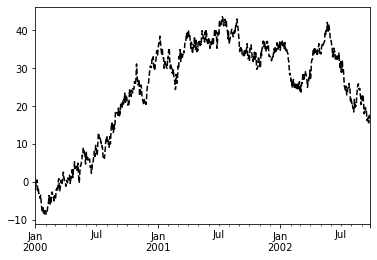

In [182]:
s.plot(style='k--') # 绘图看一下变化，原数据

<AxesSubplot:>

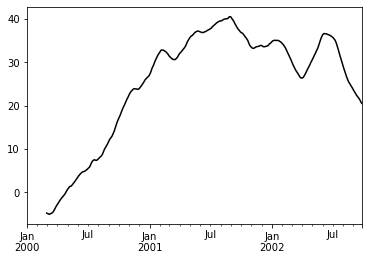

In [183]:
r.mean().plot(style='k')  # 绘图看一下变化，计算后的

#### DataFrame 的应用
它们也可以应用于DataFrame对象。 这实际上只是将移动窗口运算符应用于DataFrame 的所有列的语法糖：

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

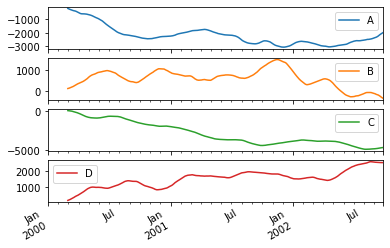

In [184]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()
# 操作并绘图
df.rolling(window=60).sum().plot(subplots=True)

#### 统计方法

提供许多常见的统计功能：

| Method     | Description                                |
| ---------- | ------------------------------------------ |
| count()    | Number of non-null observations            |
| sum()      | Sum of values                              |
| mean()     | Mean of values                             |
| median()   | Arithmetic median of values                |
| min()      | Minimum                                    |
| max()      | Maximum                                    |
| std()      | Bessel-corrected sample standard deviation |
| var()      | Unbiased variance                          |
| skew()     | Sample skewness (3rd moment)               |
| kurt()     | Sample kurtosis (4th moment)               |
| quantile() | Sample quantile (value at %)               |
| apply()    | Generic apply                              |
| cov()      | Unbiased covariance (binary)               |
| corr()     | Correlation (binary)                       |

#### 使用函数 apply()

apply() 函数接受一个额外的 func 参数，并执行通用滚动计算。 func 参数应该是一个从 ndarray 输入生成单个值的函数。 假设我们要滚动计算平均绝对偏差：

<AxesSubplot:>

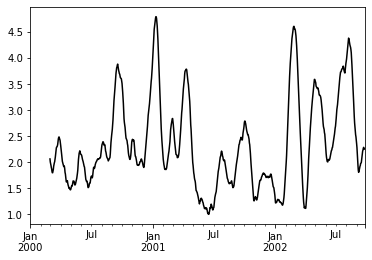

In [185]:
def mad(x):
    return np.fabs(x - x.mean()).mean()

s.rolling(window=60).apply(mad, raw=True).plot(style='k')

#### 时间类型移动窗口
可以将偏移量（或可转换）传递给.rolling() 方法，并使其根据传递的时间窗口生成可变大小的窗口。 对于每个时间点，这包括在指示的时间增量内出现的所有先前值。

In [186]:
dft = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index=pd.date_range('20130101 09:00:00',
                                       periods=5,
                                       freq='s'))

dft

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,2.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,4.0


In [187]:
dft.rolling(2).sum()

,B
2013-01-01 09:00:00,NaN
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,NaN
2013-01-01 09:00:04,NaN


In [188]:
dft.rolling(2, min_periods=1).sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


指定移动频率

In [189]:
dft.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:01,1.0
2013-01-01 09:00:02,3.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:04,4.0


**时间感知滚动与重采样**  
将 .rolling() 与基于时间的索引一起使用非常类似于重采样。它们既对时间索引的 Pandas 对象进行操作又执行还原操作。

当使用带有偏移量的.rolling() 时。偏移量是时间增量。取得一个向后看的窗口，并汇总该窗口中的所有值（包括终点，但不包括起点）。这是结果中此时的新值。对于输入的每个点，这些都是时空可变大小的窗口，将获得与输入相同大小的结果。

当使用带有偏移量的.resample() 时。构造一个新的索引，它是偏移的频率。对于每个频率仓，在该时间仓中的时间倒退窗口内，从输入汇总点。聚合的结果是该频率点的输出。窗口在频率空间中是固定大小的。您的结果将具有介于原始输入对象的最小值和最大值之间的规则频率形状。

总而言之，.rolling() 是基于时间的窗口操作，而.resample() 是基于频率的窗口操作。

### 扩展窗口函数 expanding
滚动统计的一种常见替代方法是使用扩展窗口，该窗口可生成该统计的值以及该时间点之前所有可用的数据。

#### 使用
它们遵循与.rolling 类似的接口，其中.expanding 方法返回 Expanding 对象。

由于这些计算是滚动统计的特殊情况，因此它们在 Pandas 中实现，因此以下两个调用是等效的：

In [197]:
df.rolling(window=len(df), min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,1.049313,0.111910,0.322994,-1.091590
2000-01-02,0.919457,-0.534175,0.146955,-1.443932
2000-01-03,0.876989,-0.459435,0.209525,-1.924145
2000-01-04,0.963262,-0.896879,0.056904,-2.227882
2000-01-05,0.960253,-0.964472,0.224515,-2.138985


In [198]:
df.expanding(min_periods=1).mean()[:5]

,A,B,C,D
2000-01-01,1.049313,0.111910,0.322994,-1.091590
2000-01-02,0.919457,-0.534175,0.146955,-1.443932
2000-01-03,0.876989,-0.459435,0.209525,-1.924145
2000-01-04,0.963262,-0.896879,0.056904,-2.227882
2000-01-05,0.960253,-0.964472,0.224515,-2.138985


#### 统计方法

具有与.rolling方法类似的方法:

| Method     | Description                                |
| ---------- | ------------------------------------------ |
| count()    | Number of non-null observations            |
| sum()      | Sum of values                              |
| mean()     | Mean of values                             |
| median()   | Arithmetic median of values                |
| min()      | Minimum                                    |
| max()      | Maximum                                    |
| std()      | Bessel-corrected sample standard deviation |
| var()      | Unbiased variance                          |
| skew()     | Sample skewness (3rd moment)               |
| kurt()     | Sample kurtosis (4th moment)               |
| quantile() | Sample quantile (value at %)               |
| apply()    | Generic apply                              |
| cov()      | Unbiased covariance (binary)               |
| corr()     | Correlation (binary)                       |

#### 几个特别的Expanding类型函数
cumsum/cumprod/cummax/cummin都是特殊expanding累计计算方法

In [203]:
s.cumsum().head()

2000-01-01   -0.763718
2000-01-02   -2.799295
2000-01-03   -2.842953
2000-01-04   -2.291686
2000-01-05   -2.223691
Freq: D, dtype: float64

In [204]:
s.cumsum().head()

2000-01-01   -0.763718
2000-01-02   -2.799295
2000-01-03   -2.842953
2000-01-04   -2.291686
2000-01-05   -2.223691
Freq: D, dtype: float64

shift/diff/pct_change都是涉及到了元素关系  
①shift是指序列索引不变，但值向后移动  
②diff是指前后元素的差，period参数表示间隔，默认为1，并且可以为负  
③pct_change是值前后元素的变化百分比，period参数与diff类似  

In [205]:
s.shift(2).head()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03   -0.763718
2000-01-04   -2.035577
2000-01-05   -0.043657
Freq: D, dtype: float64

In [206]:
s.diff(3).head()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04    1.314986
2000-01-05    2.103571
Freq: D, dtype: float64

In [207]:
s.pct_change(3).head()

2000-01-01         NaN
2000-01-02         NaN
2000-01-03         NaN
2000-01-04   -1.721820
2000-01-05   -1.033403
Freq: D, dtype: float64